## Feature Selecetion

Youtube Video Explanation:

- Forward Feature Selection :  https://youtu.be/pmZNQoUfp3Y
- Backward Feature Selection : https://youtu.be/2Y4PrhMyqX0
- Exhaustive Feature Selection : https://youtu.be/0ciQ-FzhrQw

**Wrapper Method**

- The main idea behind a wrapper method is to select which set of features works best for a machine learning model.
- It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation 
  criterion.
- The evaluation criterion is simply the performance measure which depends on the type of problem, for e.g. For regression evaluation criterion can be MSE,MAE,MAPE,R-squared, Adjusted R-squared, similarly for classification the evaluation criterion can be accuracy, precision, recall, f1-score, etc. It selects the combination of features that gives the optimal results for the specified machine learning algorithm.

**1. Forward Selection**

Forward selection is an iterative method in each iteration, we keep adding the feature which best improves our
model till an addition of a new variable does not improve the performance of the model.

**2. Backward Selection**

In backward elimination, we start with all the features and removes the least significant feature at each
iteration which improves the performance of the model. We repeat this until no improvement is observed on removal
of features.

**3. Exhaustive Feature Selection**

This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

## Forward Feature Selection

- In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models. 

- Now fit a model with two features by trying combinations of the earlier selected feature with all other remaining features. Again select the feature with the higest arruracy for classificartion and less MSE/MAPE/MAE for regression models. 

- Now fit a model with three features by trying combinations of two previously selected features with other remaining features. Repeat this process until we have a set of selected features with a higest arruracy for classificartion and minimum MSE/MAPE/MAE for regression models of individual features.

### Forward Feature Selection for Classification Problem

In [814]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [815]:
"""
set = 4
df_loan = pd.read_csv(f"Fold2/fold{set}/train.csv")
df_test = pd.read_csv(f"Fold2/fold{set}/test.csv")
df_val = pd.read_csv(f"Fold2/fold{set}/validate.csv")
"""

'\nset = 4\ndf_loan = pd.read_csv(f"Fold2/fold{set}/train.csv")\ndf_test = pd.read_csv(f"Fold2/fold{set}/test.csv")\ndf_val = pd.read_csv(f"Fold2/fold{set}/validate.csv")\n'

In [816]:
#df_loan
df_loan = pd.read_csv("new_scores2.csv")

In [817]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    55 non-null     int64  
 1   number        55 non-null     object 
 2   days          55 non-null     int64  
 3   gender        55 non-null     int64  
 4   age           55 non-null     object 
 5   afftype       55 non-null     int64  
 6   melanch       55 non-null     int64  
 7   inpatient     55 non-null     int64  
 8   marriage      55 non-null     int64  
 9   work          55 non-null     int64  
 10  madrs1        55 non-null     int64  
 11  madrs2        55 non-null     int64  
 12  DeltaMADRS    23 non-null     float64
 13  Mean_MeanAct  55 non-null     float64
 14  Mean_Q99Act   55 non-null     float64
 15  Std_MeanAct   55 non-null     float64
 16  Std_Q99Act    55 non-null     float64
 17  CV_MeanAct    55 non-null     float64
 18  CV_Q99Act     55 non-null     fl

In [818]:
# Remove all null value
#df_loan.dropna(inplace=True)
# drop the uninformatica column("Loan_ID")

df_loan.drop(labels=["Unnamed: 0","number","age","DeltaMADRS","days",'CV_MeanAct','CV_Q99Act',"Stress","afftype", "melanch","inpatient"],axis=1,inplace=True)
df_loan.reset_index(drop=True,inplace=True)
"""
df_test.drop(labels=["Unnamed: 0","number","age","afftype", "melanch","marriage","work","madrs1","madrs2","DeltaMADRS"],axis=1,inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_val.drop(labels=["Unnamed: 0","number","age","afftype", "melanch","inpatient","marriage","work","madrs1","madrs2","DeltaMADRS"],axis=1,inplace=True)
df_val.reset_index(drop=True,inplace=True)

"""


'\ndf_test.drop(labels=["Unnamed: 0","number","age","afftype", "melanch","marriage","work","madrs1","madrs2","DeltaMADRS"],axis=1,inplace=True)\ndf_test.reset_index(drop=True,inplace=True)\ndf_val.drop(labels=["Unnamed: 0","number","age","afftype", "melanch","inpatient","marriage","work","madrs1","madrs2","DeltaMADRS"],axis=1,inplace=True)\ndf_val.reset_index(drop=True,inplace=True)\n'

In [819]:
#df_loan

In [820]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = df_loan.columns.tolist()
for column in cols:
    if df_loan[column].dtype == 'object':
        df_loan[column] = le.fit_transform(df_loan[column])

In [821]:
X = df_loan.iloc[:,0:-1]
y = df_loan["depressed"]

"""
X_test = df_test.iloc[:,0:-1]
y_test = df_test["y"]
X_val = df_val.iloc[:,0:-1]
y_val = df_val["y"]
"""

'\nX_test = df_test.iloc[:,0:-1]\ny_test = df_test["y"]\nX_val = df_val.iloc[:,0:-1]\ny_val = df_val["y"]\n'

In [822]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
Name: depressed, dtype: int64

In [823]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(55, 9)
(55,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [824]:
# http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
# Lets use the built in function in Python
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc

In [825]:
#from sklearn.datasets import load_iris

In [826]:
#iris = load_iris()
#X = iris.data
#y = iris.target

In [827]:
feature_names=tuple(X.columns)
feature_names

('gender',
 'marriage',
 'work',
 'madrs1',
 'madrs2',
 'Mean_MeanAct',
 'Mean_Q99Act',
 'Std_MeanAct',
 'Std_Q99Act')

In [828]:
X.shape, y.shape


((55, 9), (55,))

In [829]:
sfs1 = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=1000),
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=5)

sfs1 = sfs1.fit(X, y,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2022-04-04 01:37:43] Features: 1/9 -- score: 0.7454545454545455[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-04-04 01:37:43] Features: 2/9 -- score: 0.781818181818182[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished

[2022-04-04 01:37:43] Features: 3/9 -- score: 0.781818181818182[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [830]:
"""
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
classifier = LGR(class_weight="balanced", random_state=1, max_iter=1000, solver="liblinear")
classifier.fit(X, y)
y_pred_logistic = classifier.predict(X_test)
score = classifier.score(X_test, y_test)
cm = confusion_matrix(y_test, y_pred_logistic)
print(cm)
print(classification_report(y_test, y_pred_logistic, digits=2))
"""

'\nfrom sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report\nclassifier = LGR(class_weight="balanced", random_state=1, max_iter=1000, solver="liblinear")\nclassifier.fit(X, y)\ny_pred_logistic = classifier.predict(X_test)\nscore = classifier.score(X_test, y_test)\ncm = confusion_matrix(y_test, y_pred_logistic)\nprint(cm)\nprint(classification_report(y_test, y_pred_logistic, digits=2))\n'

In [831]:
# Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.81818182, 0.63636364, 0.72727273, 0.81818182, 0.72727273]),
  'avg_score': 0.7454545454545455,
  'feature_names': ('work',)},
 2: {'feature_idx': (2, 5),
  'cv_scores': array([0.72727273, 0.63636364, 0.81818182, 0.90909091, 0.81818182]),
  'avg_score': 0.781818181818182,
  'feature_names': ('work', 'Mean_MeanAct')},
 3: {'feature_idx': (1, 2, 5),
  'cv_scores': array([0.72727273, 0.63636364, 0.81818182, 0.90909091, 0.81818182]),
  'avg_score': 0.781818181818182,
  'feature_names': ('marriage', 'work', 'Mean_MeanAct')},
 4: {'feature_idx': (1, 2, 5, 8),
  'cv_scores': array([0.72727273, 0.63636364, 0.81818182, 0.90909091, 0.81818182]),
  'avg_score': 0.781818181818182,
  'feature_names': ('marriage', 'work', 'Mean_MeanAct', 'Std_Q99Act')},
 5: {'feature_idx': (1, 2, 3, 5, 8),
  'cv_scores': array([0.72727273, 0.63636364, 0.72727273, 0.81818182, 0.81818182]),
  'avg_score': 0.7454545454545455,
  'feature_names': ('marriage',
   'work',
  

In [832]:
sfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.81818182, 0.63636364, 0.72727273, 0.81818182, 0.72727273]),
  'avg_score': 0.7454545454545455,
  'feature_names': ('work',),
  'ci_bound': 0.08743851379342243,
  'std_dev': 0.06803013430498078,
  'std_err': 0.034015067152490384},
 2: {'feature_idx': (2, 5),
  'cv_scores': array([0.72727273, 0.63636364, 0.81818182, 0.90909091, 0.81818182]),
  'avg_score': 0.781818181818182,
  'feature_names': ('work', 'Mean_MeanAct'),
  'ci_bound': 0.1191586086016885,
  'std_dev': 0.092709445701687,
  'std_err': 0.046354722850843494},
 3: {'feature_idx': (1, 2, 5),
  'cv_scores': array([0.72727273, 0.63636364, 0.81818182, 0.90909091, 0.81818182]),
  'avg_score': 0.781818181818182,
  'feature_names': ('marriage', 'work', 'Mean_MeanAct'),
  'ci_bound': 0.1191586086016885,
  'std_dev': 0.092709445701687,
  'std_err': 0.046354722850843494},
 4: {'feature_idx': (1, 2, 5, 8),
  'cv_scores': array([0.72727273, 0.63636364, 0.81818182, 0.90909091, 0.81818182]),
 

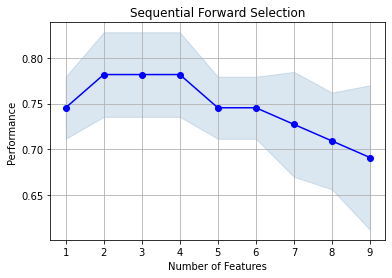

In [833]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(confidence_interval=0.95), kind='std_err')

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [834]:
# Lets access the indices of the best features directly via the k_feature_idx_ attribute:
sfs1.k_feature_names_, sfs1.k_feature_idx_

(('work', 'Mean_MeanAct'), (2, 5))

In [842]:
pd.options.display.float_format = '{:,.2f}'.format
df = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
df[["feature_idx","avg_score"]]



,feature_idx,avg_score
1,"(2,)",0.75
2,"(2, 5)",0.78
3,"(1, 2, 5)",0.78
4,"(1, 2, 5, 8)",0.78
5,"(1, 2, 3, 5, 8)",0.75
6,"(1, 2, 3, 4, 5, 8)",0.75
7,"(1, 2, 3, 4, 5, 7, 8)",0.73
8,"(0, 1, 2, 3, 4, 5, 7, 8)",0.71
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.69


### Forward Feature Selection for Regression Problem

C:\Users\james\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

Selected Features : ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')
Selected Features ID : (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)


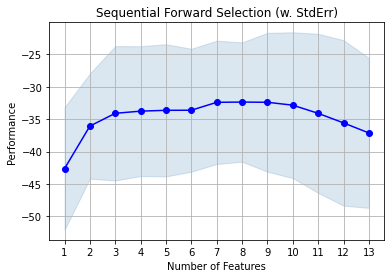

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix
y = bos['Price']               # target feature
lr = LinearRegression()
sfs = SFS(lr, 
          k_features=13,#'best', 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)
sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
print("Selected Features :", sfs.k_feature_names_)
print("Selected Features ID :", sfs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df[["feature_idx","avg_score"]]

,feature_idx,avg_score
1,"(12,)",-42.618473
2,"(10, 12)",-36.06513
3,"(5, 10, 12)",-34.100081
4,"(3, 5, 10, 12)",-33.768085
5,"(0, 3, 5, 10, 12)",-33.639224
6,"(0, 3, 5, 7, 10, 12)",-33.627648
7,"(0, 2, 3, 5, 7, 10, 12)",-32.408158
8,"(0, 1, 2, 3, 5, 7, 10, 12)",-32.36972
9,"(0, 1, 2, 3, 5, 7, 10, 11, 12)",-32.401565
10,"(0, 1, 2, 3, 4, 5, 7, 10, 11, 12)",-32.850429


## Backward Feature Selection for Classification Problem

In short, the steps involved in backward elimination are as follows:

- Choose a significance level (e.g. SL = 0.05 with a 95% confidence).
- Fit a full model including all the features.
- Consider the feature with the highest p-value. If the p-value > significance level then go to Step 4, otherwise terminate the process.
- Remove the feature which is under consideration.
- Fit a model without this feature. Repeat the entire process from Step 3.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the dataset #https://www.kaggle.com/burak3ergun/loan-data-set
df_wine = pd.read_csv("new_scores2.csv")
df_wine.drop(labels=["Unnamed: 0","number","age","afftype", "melanch","inpatient","DeltaMADRS","days",'CV_MeanAct','CV_Q99Act',"Stress"],axis=1,inplace=True)

df_wine.reset_index(drop=True,inplace=True)

In [ ]:
X = df_wine.iloc[:,0:-1]
y = df_wine["depressed"]

In [ ]:
feature_names = tuple(X.columns)
feature_names

('gender',
 'marriage',
 'work',
 'madrs1',
 'madrs2',
 'Mean_MeanAct',
 'Mean_Q99Act',
 'Std_MeanAct',
 'Std_Q99Act')

In [ ]:
# http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/
# Lets use the built in function in Python
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [ ]:
sbs = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=4000),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=5)
sbs = sbs.fit(X, y,custom_feature_names=feature_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.2s finished

[2022-04-04 01:18:45] Features: 8/1 -- score: 0.7090909090909092[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.7s finished

[2022-04-04 01:18:46] Features: 7/1 -- score: 0.7272727272727273[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished

[2022-04-04 01:18:47] Features: 6/1 -- score: 0.7636363636363637[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
#print("Selected Features :", sbs.k_feature_names_)
sbs.k_feature_names_, sbs.k_feature_idx_

(('work', 'Mean_MeanAct', 'Std_MeanAct'), (2, 5, 7))

In [ ]:
#df.style.set_properties(**{'text-align': 'left'})
df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]
#["feature_names"] = df["feature_names"].str.wrap(1000) #to set max line width of 100

In [ ]:
df

,feature_idx,avg_score
9,"(0, 1, 2, 3, 4, 5, 6, 7, 8)",0.690909
8,"(0, 1, 2, 3, 4, 5, 6, 7)",0.709091
7,"(0, 1, 2, 3, 4, 5, 7)",0.727273
6,"(0, 1, 2, 4, 5, 7)",0.763636
5,"(0, 1, 2, 5, 7)",0.745455
4,"(0, 2, 5, 7)",0.763636
3,"(2, 5, 7)",0.781818
2,"(2, 5)",0.781818
1,"(2,)",0.745455


In [ ]:
sbs.subsets_

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.54545455, 0.45454545, 0.81818182, 0.81818182, 0.81818182]),
  'avg_score': 0.690909090909091,
  'feature_names': ('gender',
   'marriage',
   'work',
   'madrs1',
   'madrs2',
   'Mean_MeanAct',
   'Mean_Q99Act',
   'Std_MeanAct',
   'Std_Q99Act')},
 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.63636364, 0.45454545, 0.81818182, 0.81818182, 0.81818182]),
  'avg_score': 0.7090909090909092,
  'feature_names': ('gender',
   'marriage',
   'work',
   'madrs1',
   'madrs2',
   'Mean_MeanAct',
   'Mean_Q99Act',
   'Std_MeanAct')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 7),
  'cv_scores': array([0.63636364, 0.54545455, 0.81818182, 0.81818182, 0.81818182]),
  'avg_score': 0.7272727272727273,
  'feature_names': ('gender',
   'marriage',
   'work',
   'madrs1',
   'madrs2',
   'Mean_MeanAct',
   'Std_MeanAct')},
 6: {'feature_idx': (0, 1, 2, 4, 5, 7),
  'cv_scores': array([0.72727273, 0.54545455, 0.81

Selected Features : ('work', 'Mean_MeanAct', 'Std_MeanAct')
Selected Features ID : (2, 5, 7)


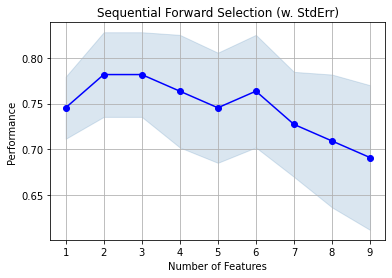

In [ ]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
print("Selected Features :", sbs.k_feature_names_)
print("Selected Features ID :", sbs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

**Disadvantages of Forward and Backward Feature Selection**

1. Since we know that SFS adds features at each iteration, a problem can occur when we add up a feature that was useful in the beginning, but after adding more ones, is now non-useful. At this point, there’s no way to remove this kind of feature.
2. The same thing happens to SBS but in the reverse direction—this is because of the inability of SBS to see the usefulness of a feature after being removed from the feature set.
3. For above reasons, and for more generalization for SBS and SFS, there are two methods that can solve such an issue: 

    - Exhaustive Feature Selection
    - Recursive Feature Elimination

## Exhaustive Feature Selection

This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection

In [ ]:
from sklearn.datasets import load_iris
df_wine = pd.read_csv("new_scores2.csv")
df_wine.drop(labels=["Unnamed: 0","number","age","afftype", "melanch","inpatient","DeltaMADRS","days",'CV_MeanAct','CV_Q99Act',"Stress"],axis=1,inplace=True)

df_wine.reset_index(drop=True,inplace=True)

In [ ]:
X = df_wine.iloc[:,0:-1]
y = df_wine["depressed"]

In [ ]:
feature_names = tuple(X.columns)
feature_names

('gender',
 'marriage',
 'work',
 'madrs1',
 'madrs2',
 'Mean_MeanAct',
 'Mean_Q99Act',
 'Std_MeanAct',
 'Std_Q99Act')

In [ ]:
efs = ExhaustiveFeatureSelector(
           #knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=100),
           min_features=1, 
           max_features=9, 
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers,
           n_jobs=8,
           cv=5)

In [ ]:
efs = efs.fit(X, y,custom_feature_names=feature_names)

Features: 511/511

In [ ]:
efs.best_feature_names_

('work', 'Mean_MeanAct', 'Std_MeanAct', 'Std_Q99Act')

In [ ]:
efs.best_score_

0.8

In [ ]:
df = pd.DataFrame.from_dict(efs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]
df

,feature_idx,avg_score
0,"(0,)",0.509091
1,"(1,)",0.581818
2,"(2,)",0.745455
3,"(3,)",0.6
4,"(4,)",0.672727
...,...,...
506,"(0, 1, 2, 4, 5, 6, 7, 8)",0.709091
507,"(0, 1, 3, 4, 5, 6, 7, 8)",0.636364
508,"(0, 2, 3, 4, 5, 6, 7, 8)",0.690909
509,"(1, 2, 3, 4, 5, 6, 7, 8)",0.690909


**Advantages:**
1. They detect the interaction between variables
2. They find the optimal feature subset for the desired machine learning algorithm

**Disadvantages:**
1. Computationaly are very expensive and takes lots of time.